# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
#I tries to use Beautiful Soup... No luck!
# Read in HTML tables into a DataFrame
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
#Select Table
mars_df = df[0]




### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Create a Pandas DataFrame & Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [6]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])



In [8]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [9]:
# 1. How many months are there on Mars?
print(mars_df['month'].unique())

[ 6  7  8  9 10 11 12  1  2  3  4  5]


In [10]:
# 2. How many Martian days' worth of data are there?
mars_df.sol.count()

1867

In [11]:
# 3. What is the average low temperature by month?
avg_low_temp=mars_df.groupby('month')['min_temp'].mean()
print(avg_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


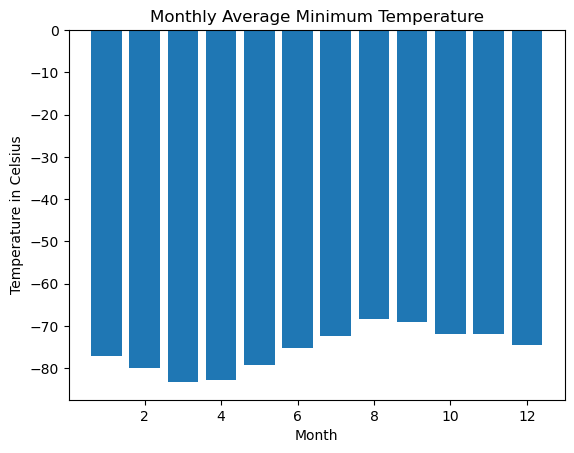

In [12]:
# Plot the average temperature by month
#Create Bar Graph
avg_low_temp_df=pd.DataFrame(avg_low_temp)
temp=(avg_low_temp_df.min_temp)
month=(avg_low_temp_df.index)
plt.bar(month, temp)
plt.title('Monthly Average Minimum Temperature')
plt.ylabel("Temperature in Celsius")
plt.xlabel("Month")
plt.show()

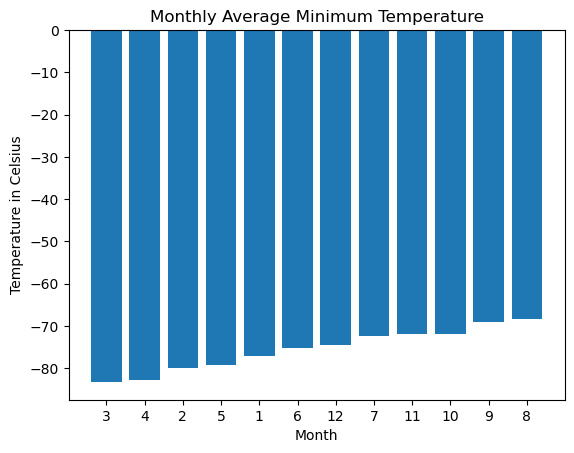

In [13]:
# Identify the coldest and hottest months in Curiosity's location
#Sort DF on min_temp
sorted_df=avg_low_temp_df.sort_values("min_temp", ascending=True)
sorted_df.reset_index(inplace=True)
#Create Bar Graph
temp=(sorted_df.min_temp)
month=(sorted_df.index)
plt.bar(month, temp)
tick_locations = [value for value in month]
mnths=[value for value in sorted_df.month]
plt.xticks(tick_locations, mnths)
plt.title('Monthly Average Minimum Temperature')
plt.ylabel("Temperature in Celsius")
plt.xlabel("Month")
plt.show()

In [14]:
# 4. Average pressure by Martian month
avg_pressure=mars_df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


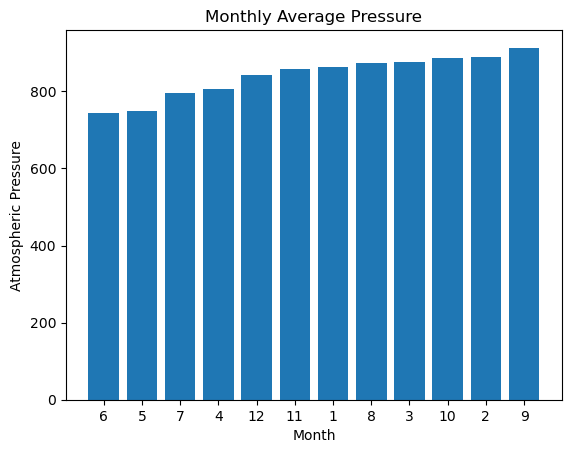

In [15]:
# Plot the average pressure by month
# Sort values on pressure
avg_pressure_df=pd.DataFrame(avg_pressure)
sorted_df= avg_pressure_df.sort_values("pressure", ascending=True)
sorted_df.reset_index(inplace=True)

#Create Bar Graph
press=(sorted_df.pressure)
month=(sorted_df.index)
plt.bar(month, press)
tick_locations = [value for value in month]
mnths=[value for value in sorted_df.month]
plt.xticks(tick_locations, mnths)
plt.title('Monthly Average Pressure')
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Month")
plt.show()


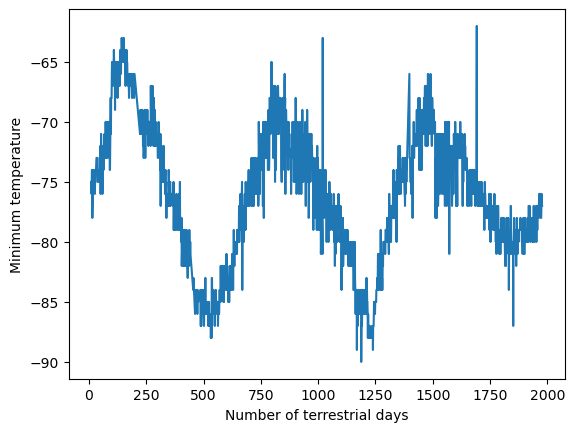

In [16]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Create graph to anaylize length of martian year
min_temp=mars_df.min_temp
days=mars_df.sol
plt.plot(days, min_temp)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [17]:
# Write the data to a CSV
file_path = 'mars_data.csv'

# Write DataFrame to CSV
mars_df.to_csv(file_path, index=False) 

In [18]:
browser.quit()

Analysis:

1. How many months exist on Mars?
    ### 12

2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
    ### 1867

3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 
    ### Month 3 is the coldest, while month 8 is the warmest. 

4. Which months have the lowest and the highest atmospheric pressure on Mars? 
    ### Month 6 has the lowest atmospheric pressure, while month 9 has the highest.

5. About how many terrestrial (Earth) days exist in a Martian year? 
    ### My guess, by looking at the graph would be approximatly 700 days. (1200-500)